# **Fashion-MNIST Clothing Classification using Convolutional Neural Network (CNN)**

The Fashion-MNIST clothing dataset is a new standard one used in computer vision (CV) and deep learning (DL).

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses,etc for training and another set of 10,000 similar images for testing.

The mapping of all 0-9 integers to class labels is listed below:

```
0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot
```



The training and test data sets have 785 columns.

The first column consists of the class labels (see above), and represents the article of clothing.

The rest of 784 columns (1-785) contain the pixel-values of the associated image.

###Importing the libraries:

In [3]:
import tensorflow as tf
from tensorflow .keras import datasets, layers, models,regularizers #TensorFlow's high-level API for building and training deep learning models.
import matplotlib.pyplot as plt #to visualize data.
import seaborn as sns
import numpy as np

###Loading the dataset:

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [5]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

###Data Processing:

In [6]:
type(train_images)

numpy.ndarray

In [7]:
print(len(train_images))

60000


In [8]:
print(len(test_images))

10000


In [9]:
print(train_images.shape)

(60000, 28, 28)


This means we have 60000 training images with length and width of 28x28.

In [10]:
print(train_images[0].shape)

(28, 28)


In [11]:
print(test_images[0].shape)

(28, 28)


The images in training and test dataset are of same shape. Images of same aspect ratio help neural networks learn better.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

The images are in greyscale as it doesn't show the number of channels.
In a gray-scale image, each pixel has a value between 0 and 255, where zero corresponds to “black” and 255 corresponds to “white”. The values in between 0 and 255 are varying shades of gray, where values closer to 0 are darker and values closer to 255 are lighter.

In [12]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255.



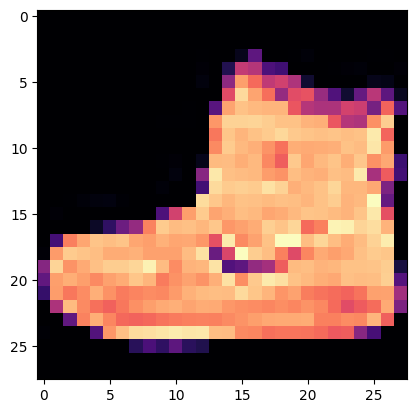

In [13]:
#Displaying the first image from the dataset
plt.imshow(train_images[0],cmap='magma')
plt.show()

In [14]:
unique_values, counts = np.unique(train_labels, return_counts=True)
print("Unique values in training set:", unique_values)
print("Counts:", counts)

Unique values in training set: [0 1 2 3 4 5 6 7 8 9]
Counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


The labels of training images/class names are :

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

They are each 6000 in number.

In [15]:
class_names = ['T-shirt/top', 'Trouser', ' Pullover', 'Dress', 'Coat',
               'Sandal', ' Shirt', 'Sneaker', ' Bag', 'Ankle boot']

Text(0.5, 1.0, 'Count of Images in each class')

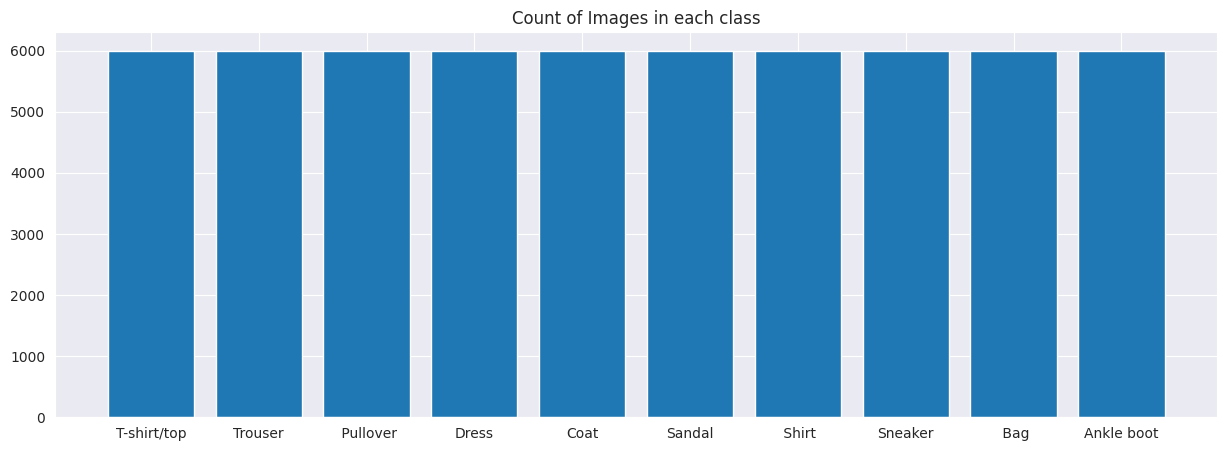

In [16]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
plt.bar(class_names,counts)
plt.title('Count of Images in each class')

Unique values in test set: [0 1 2 3 4 5 6 7 8 9]
Counts: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


Text(0.5, 1.0, 'Count of Images in each class')

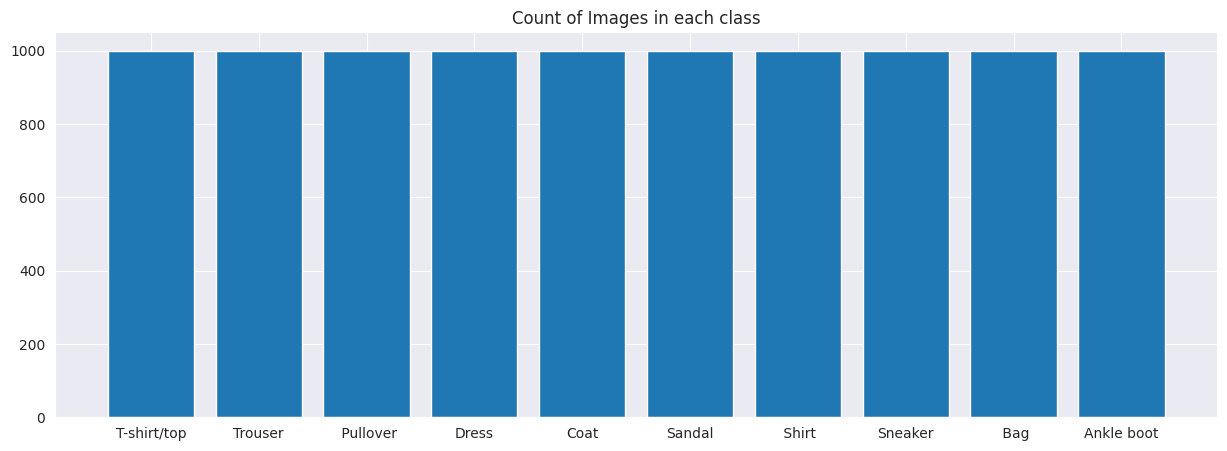

In [17]:
unique_testvalues, counts_test = np.unique(test_labels, return_counts=True)
print("Unique values in test set:", unique_testvalues)
print("Counts:", counts_test)
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
plt.bar(class_names,counts_test)
plt.title('Count of Images in each class')

In [18]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
#this process ensures consistent data scaling, making training more stable and efficient.
#it also reduces the risk of model being stuck at local minimum.

In [19]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

##Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

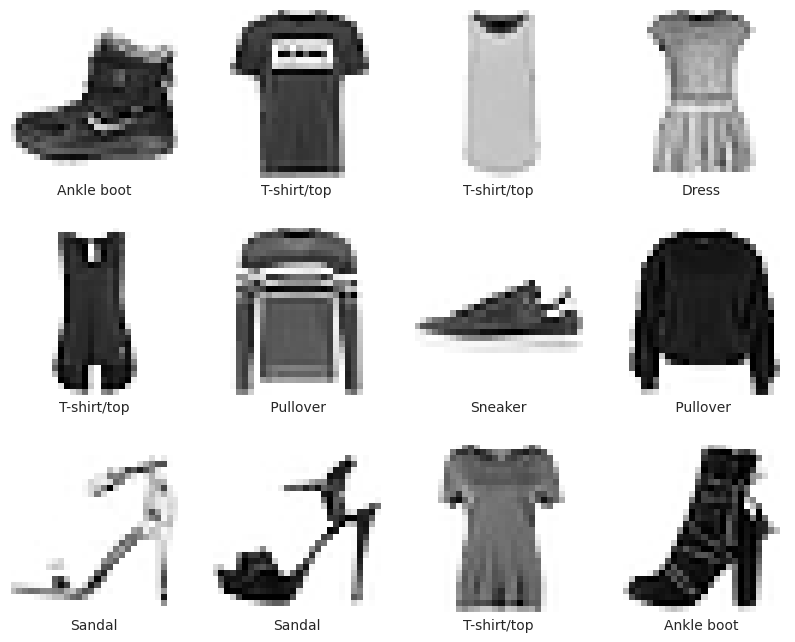

In [21]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='Greys')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Reshaping the images to 4 dimensional since keras/tf models required 4D data:**

Since the images are grayscale, 4th dimension is 1 which denotes the number of channels. So the channel information is also added.

In [22]:
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((len(test_images),28,28,1))

In [23]:
train_images.shape

(60000, 28, 28, 1)

In [24]:
test_images.shape

(10000, 28, 28, 1)

#Convolutional Neural Network:

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size.

In [25]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))

In [28]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Let's display the architecture of the model:

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                        

Let's also plot the model

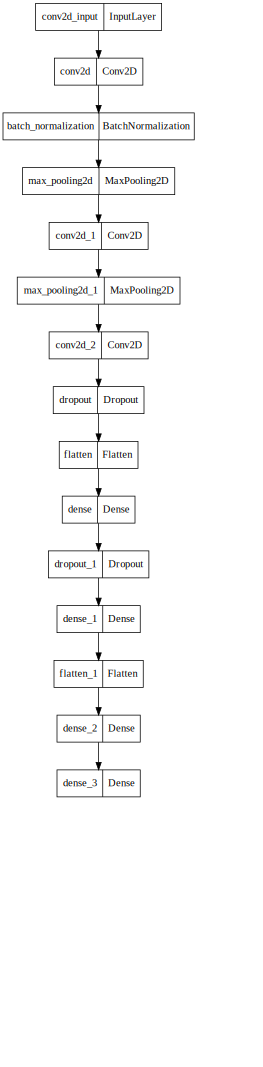

In [31]:
from IPython.display import SVG
from keras.utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

###Compile and train the model:

In [32]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

#Model training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 98s 50ms/step - loss: 1.0826 - accuracy: 0.5573 - val_loss: 0.6255 - val_accuracy: 0.7529
Epoch 2/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.5776 - accuracy: 0.7643 - val_loss: 0.4852 - val_accuracy: 0.7943
Epoch 3/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.4709 - accuracy: 0.8267 - val_loss: 0.3897 - val_accuracy: 0.8704
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.4053 - accuracy: 0.8597 - val_loss: 0.3524 - val_accuracy: 0.8820
Epoch 5/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.3745 - accuracy: 0.8735 - val_loss: 0.3437 - val_accuracy: 0.8826
Epoch 6/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3533 - accuracy: 0.8798 - val_loss: 0.3134 - val_accuracy: 0.8924
Epoch 7/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3322 - accuracy: 0.8877 - val_loss: 0.3191 -

###Evaluating the model

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 4s - loss: 0.2916 - accuracy: 0.9048 - 4s/epoch - 12ms/step

Test accuracy: 0.9047999978065491

Test loss: 0.2916037440299988


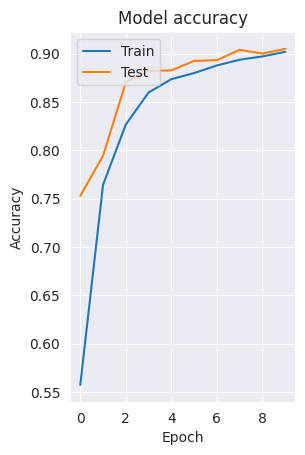

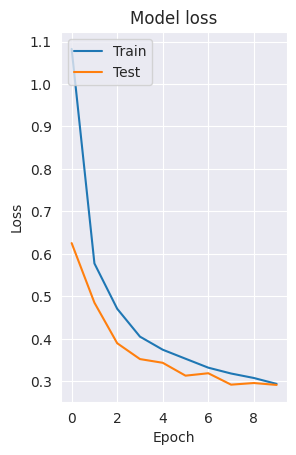

In [35]:
# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

###Predicting output

In [49]:
# predicted output
pred_labels_enc = model.predict(test_images)

# obtaining integer label values from the above predicted values by selecting the index of the highest probability or score
pred_labels = [np.argmax(i) for i in pred_labels_enc]
#print(pred_labels_enc[0])


313/313 [==============================] - 4s 12ms/step


In [50]:
#displaying predicted labels
ind=int(input('Enter the index number of which the test and predicted classes to be displayed : '))
print('The class from the given test set : ',test_labels[ind])
print('The predicted class : ',pred_labels[ind])


Enter the index number of which the test and predicted classes to be displayed : 10
The class from the given test set :  4
The predicted class :  4


###Classification Report and Confusion Matrix:

In [64]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.94      0.88      0.91      1000
        Coat       0.85      0.83      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.68      0.76      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.90      0.91     10000



#Observations:

The overall accuracy of the model is 90%. The model classified the “Trouser” class 100% correctly but seemed to struggle quite a bit with the “Shirt” class (~68% accurate).


*   The model correctly identifies 86% of the T-shirt/top images it predicts, and 84% of all actual T-shirt/top images are correctly identified.
*   The model has excellent performance on Trousers, with perfect precision and nearly perfect recall, resulting in a very high F1-score.
*   The model performs consistently well for Pullovers, with balanced precision and recall both at 86%.
*   The model is good at identifying Dresses, with high precision and reasonably high recall.
*   The model has decent performance for Coats, though there's slight room for improvement in both precision and recall.
*   The model performs excellently on Sandals, with high precision and recall.
*   The model struggles the most with Shirts, having the lowest precision and recall among all classes. This indicates more misclassifications compared to other classes.
*   The model is very accurate in identifying Sneakers, with high precision and recall.
*   The model performs excellently on Bags, with high precision and recall.
*   The model is very accurate in identifying Ankle boots, with high precision and recall.

Macro Average : This is the unweighted mean of the individual class metrics. The model has high precision, recall, and F1-scores on average across all classes.

Weighted Average : This takes into account the support (number of true instances) for each class, indicating that the model's high performance is consistent across the dataset.

In [52]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(test_labels, pred_labels)
cnf_matrix

array([[845,   0,  13,   9,   1,   1, 123,   1,   7,   0],
       [  1, 976,   0,  13,   3,   0,   5,   0,   2,   0],
       [ 12,   1, 857,   6,  55,   0,  69,   0,   0,   0],
       [ 18,   0,   6, 878,  38,   1,  59,   0,   0,   0],
       [  0,   1,  58,  17, 833,   0,  90,   0,   1,   0],
       [  0,   0,   0,   0,   0, 979,   0,  15,   0,   6],
       [106,   2,  57,  11,  52,   0, 762,   0,  10,   0],
       [  0,   0,   0,   0,   0,  10,   0, 975,   0,  15],
       [  0,   0,   1,   3,   0,   3,  11,   4, 978,   0],
       [  1,   0,   0,   0,   0,   4,   0,  30,   0, 965]])

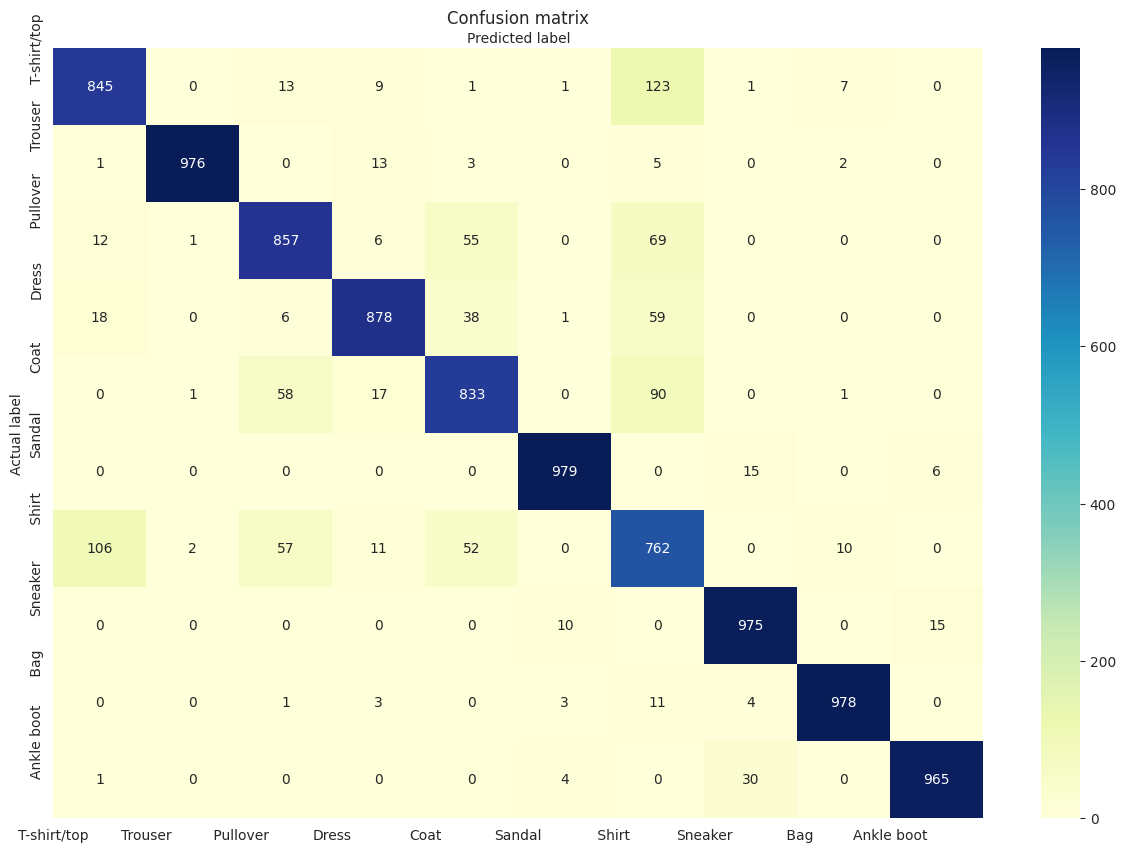

In [66]:
#Visualisation of confusion matrix
fig, ax = plt.subplots(figsize=(15, 10))
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()